In [1]:
import sys,os
import numpy as np
import matplotlib.pyplot as plt
sys.path.append('./bin')
import PolA_A_allpars
import matplotlib as mpl

mpl.rcParams['font.size']=12

In [2]:
def plot_parset(pars,title=None,ax=None,color="k",figname=None):
    Arange=np.logspace(-1,1,100)
    
    m0=PolA_A_allpars.interface_GRF_PolA_A(pars.copy(),0)
    print(m0)
    out=np.zeros(len(Arange))
    for a,A in enumerate(Arange):
        #m=PolAB_A_allpars.interface_GRF_PolAB_A_A(pars.copy(),np.array([0]),A)
        m=PolA_A_allpars.interface_GRF_PolA_A(pars.copy(),A)
        out[a]=m/m0
    #ax=plt.subplots(1,1,figsize=(6,4))
    if ax is None:
        fig,ax=plt.subplots(1,1,figsize=(3,2.5))
        show=True
    else:
        show=False
    ax.plot(Arange,out,color=color)
    ax.set_xscale("log")
    ax.set_xlabel(r"[$x$]",size=14)
    #if k==0:
    ax.set_ylabel('fold change',size=14)
    ax.axhline(y=1,linestyle="--",color="gray")
    if title is not None:
         ax.set_title(title)
    if figname is not None:
        plt.tight_layout()
        plt.savefig(figname,bbox_inches="tight")
    if show:
        plt.tight_layout()
        plt.show()
        return 
    else:
        return ax
    
def plot_parset_ku(pars_,title=None,ax=None,color="k",A=1,figname=None):
    kuvals=np.logspace(1,3,100)
    out=[]
    for b, ku in enumerate(kuvals):
        binding=[kb,ku]*6

        parslist=pars_+binding
        pars=np.array(parslist)
        m0=PolA_A_allpars.interface_GRF_PolA_A(pars.copy(),0)
        mA=PolA_A_allpars.interface_GRF_PolA_A(pars.copy(),A)
        out.append(mA/m0)
    
    if ax is None:
        fig,ax=plt.subplots(1,1,figsize=(3,2.5))
        show=True
    else:
        show=False
    ax.plot(kuvals,out,color=color)
    ax.set_xscale("log")
    ax.set_xlabel(r"$k_u$",size=14)
    #if k==0:
    ax.set_ylabel('fold change',size=14)
    ax.axhline(y=1,linestyle="--",color="gray")
    if title is not None:
         ax.set_title(title)
    if figname is not None:
        plt.tight_layout()
        plt.savefig(figname,bbox_inches="tight")
    if show:
        plt.tight_layout()
        plt.show()
        return 
    else:
        return ax

In [3]:
figsfolder="./figscode"

0.25


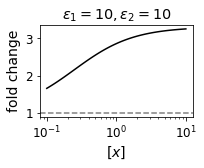

In [4]:
ktin0=1
ktni0=1
ktia0=1
ktan0=1


ktinA=1
ktniA=10
ktiaA=10
ktanA=1
kb=100
ku=100

#first show concentration-dependence

binding=[kb,ku]*6

parslist=[ktia0,ktan0,ktin0,ktni0,ktiaA,ktanA,ktinA,ktniA]+binding
pars=np.array(parslist)
plot_parset(pars,figname=os.path.join(figsfolder,"Fig3up.svg"),title="$\epsilon_1=%g,\epsilon_2=%g$"%(ktniA/ktni0,ktiaA/ktia0))

0.25


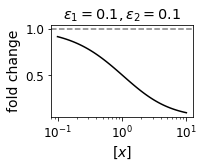

In [5]:
ktin0=1
ktni0=1
ktia0=1
ktan0=1


ktinA=1
ktniA=0.1
ktiaA=0.1
ktanA=1
kb=100
ku=100

#first show concentration-dependence

binding=[kb,ku]*6

parslist=[ktia0,ktan0,ktin0,ktni0,ktiaA,ktanA,ktinA,ktniA]+binding
pars=np.array(parslist)
plot_parset(pars,figname=os.path.join(figsfolder,"Fig3down.svg"),title="$\epsilon_1=%g,\epsilon_2=%g$"%(ktniA/ktni0,ktiaA/ktia0))

0.045454545454545456


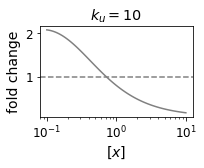

0.045454545454545456


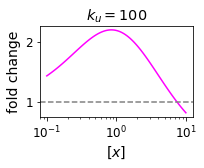

0.045454545454545456


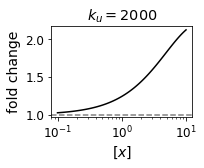

In [6]:
ktin0=1
ktni0=0.1
ktia0=1.
ktan0=1


ktinA=1
ktniA=0.75
ktiaA=0.01
ktanA=1
kb=100
#fig,axes=plt.subplots(1,3,figsize=(10,3))
kulist=[10,100,2000]
colors_ku={10:"gray",100:"magenta",2000:"k"}
fignames=["Fig3C_d.svg","Fig3C_m.svg","Fig3C_u.svg"]
for b,ku in enumerate(kulist):
    binding=[kb,ku]*6

    parslist=[ktia0,ktan0,ktin0,ktni0,ktiaA,ktanA,ktinA,ktniA]+binding
    pars=np.array(parslist)
    plot_parset(pars,title=r"$k_u=%g$"%ku,color=colors_ku[ku],figname=os.path.join(figsfolder,fignames[b]))

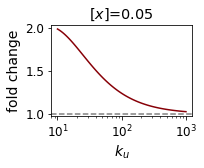

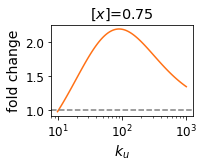

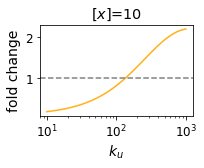

In [7]:
xvals_list=[0.05,0.75,10]
colors_x=["#870007ff","#ff7116ff","#ffb116ff"]
fignames=["Fig3Cku_d.svg","Fig3Cku_m.svg","Fig3Cku_u.svg"]
for x_,x in enumerate(xvals_list):
    parslist=[ktia0,ktan0,ktin0,ktni0,ktiaA,ktanA,ktinA,ktniA]
    plot_parset_ku(parslist,title=r"[$x$]=$%g$"%x,color=colors_x[x_],A=x,figname=os.path.join(figsfolder,fignames[x_]))
    

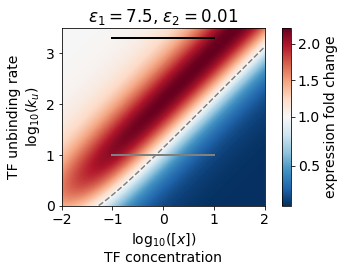

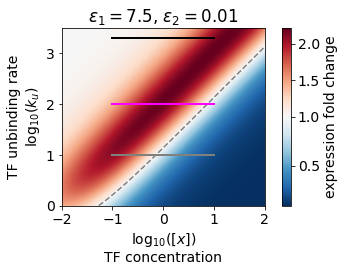

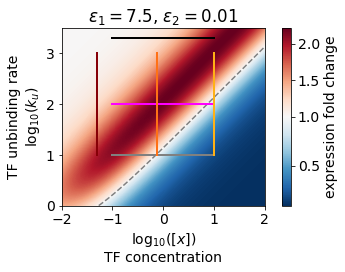

In [15]:
xvals=np.logspace(-2,2,500)
kuvals=np.logspace(0,3.5,500)
out=np.zeros((len(kuvals), len(xvals)))

for b, ku in enumerate(kuvals):
    binding=[kb,ku]*6

    parslist=[ktia0,ktan0,ktin0,ktni0,ktiaA,ktanA,ktinA,ktniA]+binding
    pars=np.array(parslist)
    m0=PolA_A_allpars.interface_GRF_PolA_A(pars.copy(),0)
    #print(m0)
    
    for x_,x in enumerate(xvals):
        #m=PolAB_A_allpars.interface_GRF_PolAB_A_A(pars.copy(),np.array([0]),A)
        m=PolA_A_allpars.interface_GRF_PolA_A(pars.copy(),x)
        out[b,x_]=m/m0


for fignum in range(3):
    fig,ax=plt.subplots(1,1,figsize=(6,4)) 
    #ar=np.ma.masked_array(out,mask=out<1)
    if out.min()<1:
        norm=mpl.colors.TwoSlopeNorm(vmin=out.min(), vcenter=1., vmax=out.max())
        cmap=plt.cm.RdBu_r
    else:
        norm=None
        cmap=plt.cm.Blues
    extent=[np.log10(xvals[0]),np.log10(xvals[-1]),np.log10(kuvals[0]),np.log10(kuvals[-1])]
    im=ax.imshow(out,origin="lower",norm=norm,cmap=cmap,extent=extent)
    ax.contour(out,extent=extent,levels=[1],linestyles=["--"],colors=["gray"])
    if fignum==0:
        kulist_=[kulist[0],kulist[-1]]
    else:
        kulist_=kulist
    for k_,ku in enumerate(kulist_):
    #    print(bG)
        ax.plot([-1.,1.],[np.log10(ku),np.log10(ku)],linestyle="-",color=colors_ku[ku],linewidth=2)
    if fignum>1:
        for x_,x in enumerate(xvals_list):
            ax.plot([np.log10(x),np.log10(x)],[1,3],linestyle="-",color=colors_x[x_],linewidth=2)
    #ax.plot([1,1],[-1,1],linestyle=":",color="k")
        #ax.axhline(y=np.log10(bG),)
    #ax.set_xscale('log')
    ax.set_ylabel("TF unbinding rate\n"+r"log$_{10}$($k_u$)",size=14)
    ax.set_xlabel(r"log$_{10}$([$x$])"+"\nTF concentration",size=14)
    ax.set_title(r"$\epsilon_1=%g$, $\epsilon_2=%g$"%(ktniA/ktni0, ktiaA/ktia0))

    plt.colorbar(im,label="expression fold change",ax=ax)
    #ax.axhline(y=1,linestyle="--",color="gray")
    #if title is not None:
    #    ax.set_title(title)
    plt.tight_layout()
    plt.savefig(os.path.join(figsfolder,"Fig3colormap_r_%d.svg"%fignum))
    plt.show()

0.0045045045045045045
0.018633540372670808
0.03992015968063872


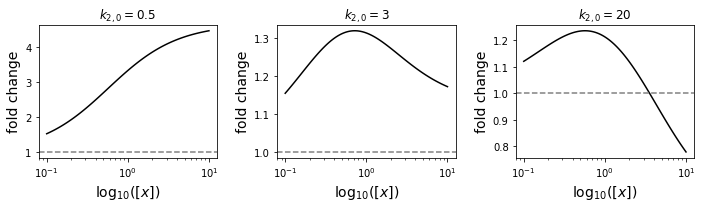

In [9]:
#now show dependence on ktia0
ktin0=10
ktni0=0.1
#ktia0=1.25
ktan0=0.1


ktinA=ktin0
ktniA=ktni0*3
ktiaA=1
ktanA=ktan0
kb=200
ku=100
binding=[kb,ku]*6
fig,axes=plt.subplots(1,3,figsize=(10,3))
for b,ktia0 in enumerate([0.5,3,20]):

    parslist=[ktia0,ktan0,ktin0,ktni0,ktiaA,ktanA,ktinA,ktniA]+binding
    pars=np.array(parslist)
    plot_parset(pars,title=r"$k_{2,0}=%g$"%ktia0,ax=axes[b])
    
     
plt.tight_layout()
plt.show()

0.03225806451612903
0.03225806451612903
0.03225806451612903


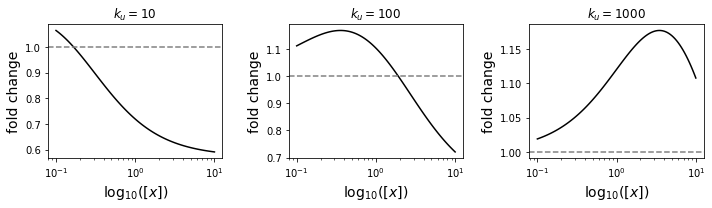

In [10]:
#now show affinity dependence when repressing first step and enhancing second
ktin0=1
ktni0=0.1
ktia0=1
ktan0=0.1


ktinA=1
ktniA=0.025
ktiaA=10
ktanA=ktan0
kb=75
fig,axes=plt.subplots(1,3,figsize=(10,3))
for b,ku in enumerate([10,100,1000]):
    binding=[kb,ku]*6

    parslist=[ktia0,ktan0,ktin0,ktni0,ktiaA,ktanA,ktinA,ktniA]+binding
    pars=np.array(parslist)
    plot_parset(pars,title=r"$k_u=%g$"%ku,ax=axes[b])
    
     
plt.tight_layout()
plt.show()